# Statistical tests

We will perform the anova test in R in this notebook

In [1]:
# Install packages
install.packages("gdata")
install.packages("gplots")
install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("car")

# Load library
library(gdata) # reorder
library(gplots) # plotmeans
library(plyr) # ddply
library(dplyr) # summarySE
library(ggplot2) # plotting library
library(ggpubr) # plotting
library(car) # Anova


The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages

The downloaded binary packages are in
	/var/folders/xh/c84094d92td2b5lb1p0l7hnh0000gn/T//RtmpWamxgB/downloaded_packages


gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.



gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.



gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX formats.


Attaching package: ‘gdata’


The following object is masked from ‘package:stats’:

    nobs


The following object is masked from ‘package:utils’:

    object.size


The following object is masked from ‘package:base’:

    startsWith


Warning message:
“package ‘gplots’ was built under R version 3.5.2”

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Warning message:
“package ‘plyr’ was built under R version 3.5.2”
Warning message:
“package ‘dplyr’ was built under R version 3.5.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, m

In [2]:
# Set the working directory
setwd("./")

# Read a csv file (header = T signals that the first line of the file contains the names of the variables).
results <- read.csv(file="results/combined_results.csv", header = T)

results$group <- as.factor(results$group)


## Exploration

In [3]:
summary(results)

                 X          score                   group   
 28AYQLYnkgBi5uKXN: 2   Min.   :0.0000   SELF DISCOVERY:22  
 2bcTjnfNuKp5hJcyK: 2   1st Qu.:0.2500   VIDEO         :22  
 53TwXKQe62kT2tnRp: 2   Median :0.5625                      
 Aw4gxBApCsdMueCwk: 2   Mean   :0.5544                      
 bFNGRyeEysDF8YCYG: 2   3rd Qu.:0.8750                      
 BMjGCT4wEQuYNyTiS: 2   Max.   :1.0000                      
 (Other)          :32                                       

In [4]:
mu <- ddply(results, "group", summarise, grp.mean=mean(score))
sigma <- ddply(results, "group", summarise, grp.sd=sd(score))

info <- merge(sigma, mu)
info

group,grp.sd,grp.mean
<fct>,<dbl>,<dbl>
SELF DISCOVERY,0.3242898,0.5866477
VIDEO,0.3144570,0.5220960


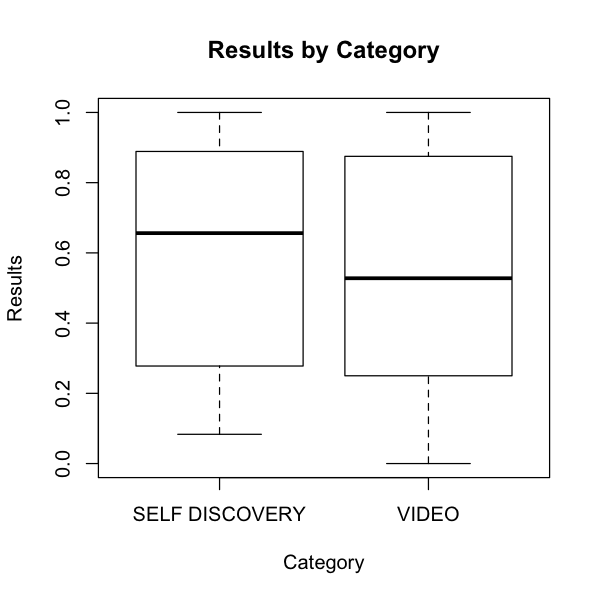

In [5]:
# Setting the size of plots generated with ggplot below. 
options(repr.plot.width = 5, repr.plot.height = 5)

# Quick and simple boxplot
boxplot(results$score ~ results$group, main="Results by Category", xlab="Category", ylab="Results")

## Test

In [6]:
m <- lm(results$score ~ results$group)  
Anova(m)

r <- residuals(m)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
results$group,0.04583624,1,0.4492713,0.5063502
Residuals,4.28498801,42,NA,NA


#### Checking assumption
We will check the assumptions for ANOVA.

* Normality of the residuals
* Homoscedasticity of the residuals = the error distribution should be the same regardless of the category.

##### Normality of the residuals

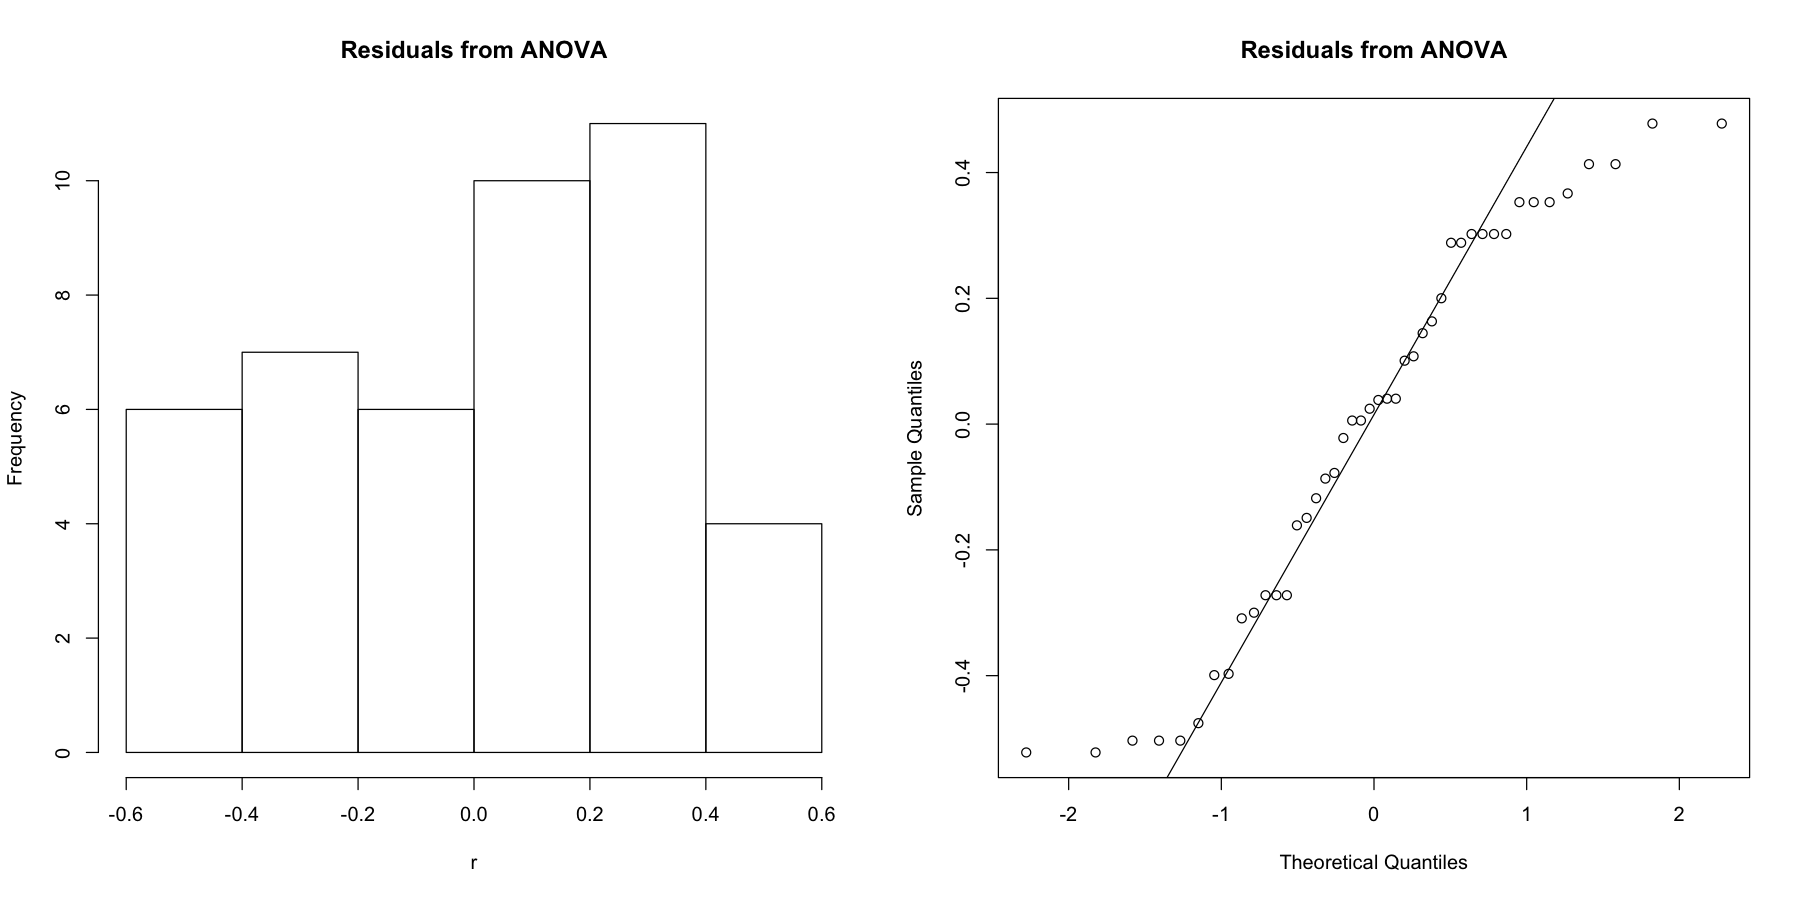

In [7]:
# split the plotting area into 2 lines and 2 columns
par(mfrow=c(1,2))

# Setting the size of plots below. 
options(repr.plot.width = 15, repr.plot.height = 7.5)

# The residuals of the model we used to run the Anova
# r <- residuals(m)
hist(r, main="Residuals from ANOVA")
qqnorm(r, main="Residuals from ANOVA");
qqline(r)

They do not seem to follow a normal law. We will test it with a shapiro test. The shapiro test :

* H0: variable is normally distributed
* H1: variable is not normally distributed

To good significance level is 0.1

In [8]:
shapiro.test(r)


	Shapiro-Wilk normality test

data:  r
W = 0.93298, p-value = 0.01328


Here we have to reject H0. And conclude that our residuals are not normally distributed.

##### Homoscedasticity

Test: Bartlett test

* H0: variances are the same
* H1: variances are different

In [9]:
bartlett.test(r ~ results$group)


	Bartlett test of homogeneity of variances

data:  r by results$group
Bartlett's K-squared = 0.019443, df = 1, p-value = 0.8891


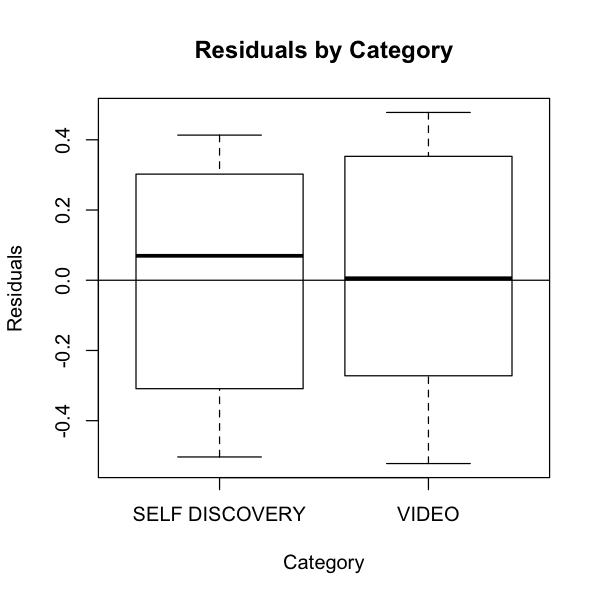

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)
boxplot(r ~ results$group, main="Residuals by Category", xlab="Category", ylab="Residuals")
abline(h=0)


We can see that the variance seem to be the same but we cannot conclude anything with that test.

Because the residuals are not normally distributed we use the Kruskal test :

* H0: the mean ranks of observations are the same in all groups
* H1: the mean ranks of observations are different.

In [11]:
kruskal.test(results$score ~ results$group)


	Kruskal-Wallis rank sum test

data:  results$score by results$group
Kruskal-Wallis chi-squared = 0.54909, df = 1, p-value = 0.4587


Here again we cannot reject the null hypothesis.
So we cannot conclude anything about the results we obtained